# Find the SNPs that define each clade

Do this on the DNA level for now

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [4]:
data_dir = Path('../data').resolve()

In [5]:
# Load all SNP files
dna_snp_files = sorted((data_dir / 'dna_snp').glob('*.csv'))
dna_snp_files

[PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0101-0131_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0201-0229_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0301-0331_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0401-0407_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0408-0414_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0415-0421_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0422-0430_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0501-0507_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0508-0514_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0515-0519_dna_snp.csv')]

In [15]:
dna_snp_df = pd.DataFrame()

for f in dna_snp_files:
    dna_snp_df = pd.concat([dna_snp_df, pd.read_csv(f)], ignore_index=True)

# Drop index column
# dna_snp_df.drop(columns=['index'], inplace=True)
    
# Extract the GISAID ID
dna_snp_df['gisaid_id'] = dna_snp_df['taxon'].str.split('|', expand=True)[1]
    
dna_snp_df

,taxon,pos,ref,alt,gisaid_id
0,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,16,C,T,EPI_ISL_406801
1,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,8782,C,T,EPI_ISL_406801
2,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,28144,T,C,EPI_ISL_406801
3,hCoV-19/Australia/VIC01/2020|EPI_ISL_406844|20...,19065,T,C,EPI_ISL_406844
4,hCoV-19/Australia/VIC01/2020|EPI_ISL_406844|20...,22303,T,G,EPI_ISL_406844
...,...,...,...,...,...
204358,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,10479,A,T,EPI_ISL_448899
204359,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,18877,C,T,EPI_ISL_448899
204360,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,23403,A,G,EPI_ISL_448899
204361,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,25563,G,T,EPI_ISL_448899


In [16]:
# Filter out ambiguous bases
dna_snp_df = dna_snp_df.loc[
    (dna_snp_df['ref'] != 'N') & (dna_snp_df['alt'] != 'N'),
    :
].reset_index(drop=True)
dna_snp_df

,taxon,pos,ref,alt,gisaid_id
0,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,16,C,T,EPI_ISL_406801
1,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,8782,C,T,EPI_ISL_406801
2,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,28144,T,C,EPI_ISL_406801
3,hCoV-19/Australia/VIC01/2020|EPI_ISL_406844|20...,19065,T,C,EPI_ISL_406844
4,hCoV-19/Australia/VIC01/2020|EPI_ISL_406844|20...,22303,T,G,EPI_ISL_406844
...,...,...,...,...,...
204358,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,10479,A,T,EPI_ISL_448899
204359,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,18877,C,T,EPI_ISL_448899
204360,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,23403,A,G,EPI_ISL_448899
204361,hCoV-19/England/SHEF-CFDD9/2020|EPI_ISL_448899...,25563,G,T,EPI_ISL_448899


In [9]:
lineage_files = sorted((data_dir / 'lineage_meta').glob('*.csv'))
lineage_files

[PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0101-0131_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0201-0229_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0301-0331_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0401-0407_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0408-0414_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0415-0421_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0422-0430_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0501-0507_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0508-0514_lineage.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/lineage_meta/gisaid_0515-0519_lineage.csv')]

In [10]:
# Load all lineage files
lineage_df = pd.DataFrame()

for f in lineage_files:
    lineage_df = pd.concat([lineage_df, pd.read_csv(f)], ignore_index=True)

lineage_df

,name,gisaid_id,sample_date,lineage
0,hCoV-19/Wuhan/IVDC-HB-01/2019,EPI_ISL_402119,2019-12-30,B
1,hCoV-19/Wuhan/IVDC-HB-04/2020,EPI_ISL_402120,2020-01-01,B
2,hCoV-19/Wuhan/IVDC-HB-05/2019,EPI_ISL_402121,2019-12-30,B
3,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,EPI_ISL_402123,2019-12-24,B
4,hCoV-19/Wuhan/WIV04/2019,EPI_ISL_402124,2019-12-30,B
...,...,...,...,...
27487,hCoV-19/USA/WA-S694/2020,EPI_ISL_449864,2020-04-08,A.1
27488,hCoV-19/USA/WA-S695/2020,EPI_ISL_449865,2020-04-08,B.1.21
27489,hCoV-19/USA/WA-S696/2020,EPI_ISL_449866,2020-04-09,A.1
27490,hCoV-19/USA/WA-S697/2020,EPI_ISL_449867,2020-04-08,A.1


In [27]:
lineage_df.head(55)

,name,gisaid_id,sample_date,lineage
0,hCoV-19/Wuhan/IVDC-HB-01/2019,EPI_ISL_402119,2019-12-30,B
1,hCoV-19/Wuhan/IVDC-HB-04/2020,EPI_ISL_402120,2020-01-01,B
2,hCoV-19/Wuhan/IVDC-HB-05/2019,EPI_ISL_402121,2019-12-30,B
3,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,EPI_ISL_402123,2019-12-24,B
4,hCoV-19/Wuhan/WIV04/2019,EPI_ISL_402124,2019-12-30,B
5,hCoV-19/Wuhan-Hu-1/2019,EPI_ISL_402125,2019-12-31,B
6,hCoV-19/Wuhan/WIV02/2019,EPI_ISL_402127,2019-12-30,B
7,hCoV-19/Wuhan/WIV05/2019,EPI_ISL_402128,2019-12-30,B
8,hCoV-19/Wuhan/WIV06/2019,EPI_ISL_402129,2019-12-30,B
9,hCoV-19/Wuhan/WIV07/2019,EPI_ISL_402130,2019-12-30,B


In [11]:
sorted(lineage_df['lineage'].unique())

['A',
 'A.1',
 'A.1.1',
 'A.1.2',
 'A.1.3',
 'A.2',
 'A.3',
 'A.4',
 'A.5',
 'A.6',
 'A.p7',
 'B',
 'B.1',
 'B.1.1',
 'B.1.1.1',
 'B.1.1.10',
 'B.1.1.13',
 'B.1.1.14',
 'B.1.1.17',
 'B.1.1.18',
 'B.1.1.2',
 'B.1.1.3',
 'B.1.1.4',
 'B.1.1.5',
 'B.1.1.6',
 'B.1.1.7',
 'B.1.1.8',
 'B.1.1.9',
 'B.1.1.p11',
 'B.1.1.p12',
 'B.1.1.p15',
 'B.1.1.p16',
 'B.1.1.p19',
 'B.1.10',
 'B.1.11',
 'B.1.12',
 'B.1.13',
 'B.1.19',
 'B.1.2',
 'B.1.20',
 'B.1.21',
 'B.1.22',
 'B.1.23',
 'B.1.24',
 'B.1.26',
 'B.1.27',
 'B.1.28',
 'B.1.29',
 'B.1.3',
 'B.1.30',
 'B.1.31',
 'B.1.32',
 'B.1.33',
 'B.1.34',
 'B.1.35',
 'B.1.36',
 'B.1.37',
 'B.1.38',
 'B.1.39',
 'B.1.40',
 'B.1.41',
 'B.1.42',
 'B.1.43',
 'B.1.44',
 'B.1.46',
 'B.1.47',
 'B.1.5',
 'B.1.5.1',
 'B.1.5.2',
 'B.1.5.3',
 'B.1.5.4',
 'B.1.5.5',
 'B.1.5.6',
 'B.1.50',
 'B.1.53',
 'B.1.54',
 'B.1.56',
 'B.1.6',
 'B.1.66',
 'B.1.67',
 'B.1.69',
 'B.1.70',
 'B.1.71',
 'B.1.72',
 'B.1.8',
 'B.1.9',
 'B.1.p11',
 'B.1.p16',
 'B.1.p2',
 'B.1.p21',
 'B.1.p25'

# Test run - Clade A

In [14]:
a_df = lineage_df.loc[lineage_df['lineage'] == 'A', :].reset_index(drop=True)
a_df

,name,gisaid_id,sample_date,lineage
0,hCoV-19/Guangdong/20SF012/2020,EPI_ISL_403932,2020-01-14,A
1,hCoV-19/Guangdong/20SF013/2020,EPI_ISL_403933,2020-01-15,A
2,hCoV-19/Guangdong/20SF025/2020,EPI_ISL_403935,2020-01-15,A
3,hCoV-19/USA/WA1/2020,EPI_ISL_404895,2020-01-19,A
4,hCoV-19/Shenzhen/HKU-SZ-005/2020,EPI_ISL_405839,2020-01-11,A
...,...,...,...,...
265,hCoV-19/Wuhan/WHUH007/2020,EPI_ISL_449482,2020-01-22,A
266,hCoV-19/Wuhan/WHUH008/2020,EPI_ISL_449483,2020-01-22,A
267,hCoV-19/Wuhan/WHUH011/2020,EPI_ISL_449484,2020-01-22,A
268,hCoV-19/Wuhan/WHUH012/2020,EPI_ISL_449485,2020-01-22,A


In [17]:
# Get the DNA SNPs
a_snp_df = dna_snp_df.loc[dna_snp_df['gisaid_id'].isin(a_df['gisaid_id']), :]
a_snp_df

,taxon,pos,ref,alt,gisaid_id
0,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,16,C,T,EPI_ISL_406801
1,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,8782,C,T,EPI_ISL_406801
2,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,28144,T,C,EPI_ISL_406801
12,hCoV-19/USA/WA1/2020|EPI_ISL_404895|2020-01-19,8782,C,T,EPI_ISL_404895
13,hCoV-19/USA/WA1/2020|EPI_ISL_404895|2020-01-19,18060,C,T,EPI_ISL_404895
...,...,...,...,...,...
200963,hCoV-19/Wuhan/WHUH020/2020|EPI_ISL_449486|2020...,3037,C,T,EPI_ISL_449486
200964,hCoV-19/Wuhan/WHUH020/2020|EPI_ISL_449486|2020...,14408,C,T,EPI_ISL_449486
200965,hCoV-19/Wuhan/WHUH020/2020|EPI_ISL_449486|2020...,23403,A,G,EPI_ISL_449486
200966,hCoV-19/Wuhan/WHUH020/2020|EPI_ISL_449486|2020...,28514,G,T,EPI_ISL_449486


In [18]:
# Group by pos, ref, alt
a_group_snp_df = a_snp_df.groupby(['pos', 'ref', 'alt'], as_index=False)['gisaid_id'].count().sort_values('gisaid_id', ascending=False)
a_group_snp_df

,pos,ref,alt,gisaid_id
14,241,C,T,146
253,14408,C,T,144
99,3037,C,T,144
383,23403,A,G,143
178,8782,C,T,75
...,...,...,...,...
201,10851,C,T,1
200,10741,C,T,1
199,10582,C,T,1
198,10532,T,A,1


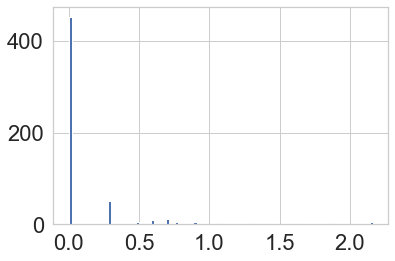

In [19]:
# Plot distribution of SNP occurences
sns.set(style='whitegrid', font_scale=2)

plt.hist(np.log10(a_group_snp_df['gisaid_id']), bins=100)
plt.show()

In [20]:
# Must be in at least 90% of sequences?
a_group_snp_df.loc[a_group_snp_df['gisaid_id'] > (len(a_df) * 0.9), :]

,pos,ref,alt,gisaid_id


In [21]:
# Must be in at least 50% of sequences?
a_group_snp_df.loc[a_group_snp_df['gisaid_id'] > (len(a_df) * 0.5), :]

,pos,ref,alt,gisaid_id
14,241,C,T,146
253,14408,C,T,144
99,3037,C,T,144
383,23403,A,G,143


In [60]:
# Just remembered that we have that stupid offset of 33, plus that these are 0-indexed and that we want 1-indexed positions in the end...

dna_snp_df['pos_corrected'] = dna_snp_df['pos'] - 33 + 1
dna_snp_df

,taxon,pos,ref,alt,gisaid_id,pos_corrected
0,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,48,C,T,EPI_ISL_406801,16
1,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,8814,C,T,EPI_ISL_406801,8782
2,hCoV-19/Wuhan/WH04/2020|EPI_ISL_406801|2020-01-05,28176,T,C,EPI_ISL_406801,28144
3,hCoV-19/Australia/VIC01/2020|EPI_ISL_406844|20...,19097,T,C,EPI_ISL_406844,19065
4,hCoV-19/Australia/VIC01/2020|EPI_ISL_406844|20...,22335,T,G,EPI_ISL_406844,22303
...,...,...,...,...,...,...
204520,hCoV-19/USA/MI-MDHHS-SC20283/2020|EPI_ISL_4470...,1091,C,T,EPI_ISL_447081,1059
204521,hCoV-19/USA/MI-MDHHS-SC20283/2020|EPI_ISL_4470...,3069,C,T,EPI_ISL_447081,3037
204522,hCoV-19/USA/MI-MDHHS-SC20283/2020|EPI_ISL_4470...,14440,C,T,EPI_ISL_447081,14408
204523,hCoV-19/USA/MI-MDHHS-SC20283/2020|EPI_ISL_4470...,23435,A,G,EPI_ISL_447081,23403


In [81]:
a_snp_df = dna_snp_df.loc[dna_snp_df['gisaid_id'].isin(a_df['gisaid_id']), :]
a_group_snp_df = a_snp_df.groupby(['pos_corrected', 'ref', 'alt'], as_index=False)['gisaid_id'].count()
# Must be in at least 50% of sequences?
a_group_snp_df.loc[a_group_snp_df['gisaid_id'] > (len(a_df) * 0.9), :]

,pos_corrected,ref,alt,gisaid_id
138,8782,C,T,244
334,28144,T,C,245


28144 agrees with clade B from the iceland paper, but the 8782 isn't there...

# Test run - Clade B

In [22]:
b_df = lineage_df.loc[lineage_df['lineage'] == 'B', :].reset_index(drop=True)
b_df

,name,gisaid_id,sample_date,lineage
0,hCoV-19/Wuhan/IVDC-HB-01/2019,EPI_ISL_402119,2019-12-30,B
1,hCoV-19/Wuhan/IVDC-HB-04/2020,EPI_ISL_402120,2020-01-01,B
2,hCoV-19/Wuhan/IVDC-HB-05/2019,EPI_ISL_402121,2019-12-30,B
3,hCoV-19/Wuhan/IPBCAMS-WH-01/2019,EPI_ISL_402123,2019-12-24,B
4,hCoV-19/Wuhan/WIV04/2019,EPI_ISL_402124,2019-12-30,B
...,...,...,...,...
1640,hCoV-19/Taiwan/TSGH-28/2020,EPI_ISL_447254,2020-03-16,B
1641,hCoV-19/Taiwan/TSGH-29/2020,EPI_ISL_447255,2020-03-17,B
1642,hCoV-19/Taiwan/TSGH-30/2020,EPI_ISL_447256,2020-03-20,B
1643,hCoV-19/Taiwan/TSGH-31/2020,EPI_ISL_447257,2020-03-25,B


In [25]:
b_group_snp_df = (
    dna_snp_df.loc[dna_snp_df['gisaid_id'].isin(b_df['gisaid_id']), :]
    .groupby(['pos', 'ref', 'alt'], as_index=False)['gisaid_id']
    .count()
    .sort_values('gisaid_id', ascending=False)
)
b_group_snp_df


,pos,ref,alt,gisaid_id
1268,23403,A,G,994
263,3037,C,T,993
811,14408,C,T,991
81,241,C,T,989
1417,25563,G,T,352
...,...,...,...,...
723,12556,A,G,1
721,12546,C,T,1
720,12529,A,G,1
719,12528,C,T,1


In [26]:
# Must be in at least 50% of sequences?
b_group_snp_df.loc[b_group_snp_df['gisaid_id'] > (len(b_df) * 0.5), :]

,pos,ref,alt,gisaid_id
1268,23403,A,G,994
263,3037,C,T,993
811,14408,C,T,991
81,241,C,T,989


Nothing...

# Test run - Clade B.1

In [28]:
b1_df = lineage_df.loc[lineage_df['lineage'] == 'B.1', :].reset_index(drop=True)
b1_df

,name,gisaid_id,sample_date,lineage
0,hCoV-19/Brazil/SPBR-01/2020,EPI_ISL_412964,2020-02-25,B.1
1,hCoV-19/Switzerland/GE5373/2020,EPI_ISL_414020,2020-02-27,B.1
2,hCoV-19/Scotland/CVR03/2020,EPI_ISL_414025,2020-03-01,B.1
3,hCoV-19/Scotland/CVR05/2020,EPI_ISL_414027,2020-03-04,B.1
4,hCoV-19/Brazil/RJ-314/2020,EPI_ISL_414045,2020-03-04,B.1
...,...,...,...,...
8299,hCoV-19/USA/WA-S676/2020,EPI_ISL_449846,2020-04-07,B.1
8300,hCoV-19/USA/WA-S677/2020,EPI_ISL_449847,2020-04-07,B.1
8301,hCoV-19/USA/WA-S678/2020,EPI_ISL_449848,2020-04-07,B.1
8302,hCoV-19/USA/WA-S679/2020,EPI_ISL_449849,2020-04-07,B.1


In [30]:
b1_group_snp_df = (
    dna_snp_df.loc[dna_snp_df['gisaid_id'].isin(b1_df['gisaid_id']), :]
    .groupby(['pos', 'ref', 'alt'], as_index=False)['gisaid_id']
    .count()
    .sort_values('gisaid_id', ascending=False)
)
b1_group_snp_df

,pos,ref,alt,gisaid_id
4280,23403,A,G,6036
2769,14408,C,T,6029
839,3037,C,T,6027
187,241,C,T,5999
5590,28881,G,A,2129
...,...,...,...,...
2540,12885,C,T,1
2542,12897,C,A,1
2543,12897,C,T,1
2545,12918,A,G,1


In [31]:
# Must be in at least 90% of sequences?
b1_group_snp_df.loc[b1_group_snp_df['gisaid_id'] > (len(b1_df) * 0.9), :]

,pos,ref,alt,gisaid_id


Agrees with Clade A2, A2a from Iceland paper

# Test run - Clade A.1

In [78]:
a1_df = lineage_df.loc[lineage_df['lineage'] == 'A.1', :].reset_index()
a1_df

,index,name,gisaid_id,sample_date,lineage
0,166,hCoV-19/USA/WA-UW142/2020,EPI_ISL_416680,2020-03-11,A.1
1,167,hCoV-19/USA/WA-UW143/2020,EPI_ISL_416681,2020-03-11,A.1
2,168,hCoV-19/USA/WA-UW144/2020,EPI_ISL_416682,2020-03-09,A.1
3,169,hCoV-19/USA/WA-UW145/2020,EPI_ISL_416683,2020-03-15,A.1
4,170,hCoV-19/USA/WA-UW146/2020,EPI_ISL_416684,2020-03-14,A.1
...,...,...,...,...,...
1275,27486,hCoV-19/USA/WA-S693/2020,EPI_ISL_449863,2020-04-08,A.1
1276,27487,hCoV-19/USA/WA-S694/2020,EPI_ISL_449864,2020-04-08,A.1
1277,27489,hCoV-19/USA/WA-S696/2020,EPI_ISL_449866,2020-04-09,A.1
1278,27490,hCoV-19/USA/WA-S697/2020,EPI_ISL_449867,2020-04-08,A.1


In [79]:
a1_group_snp_df = (
    dna_snp_df.loc[dna_snp_df['gisaid_id'].isin(a1_df['gisaid_id']), :]
    .groupby(['pos_corrected', 'ref', 'alt'], as_index=False)['gisaid_id']
    .count()
    .sort_values('gisaid_id', ascending=False)
)
a1_group_snp_df

,pos_corrected,ref,alt,gisaid_id
586,17858,A,G,1270
905,28144,T,C,1268
353,8782,C,T,1267
590,18060,C,T,1266
582,17747,C,T,1237
...,...,...,...,...
174,2632,G,T,1
529,16329,C,T,1
530,16335,T,G,1
173,2599,G,T,1


In [80]:
# Must be in at least 90% of sequences?
a1_group_snp_df.loc[a1_group_snp_df['gisaid_id'] > (len(a1_df) * 0.9), :]

,pos_corrected,ref,alt,gisaid_id
586,17858,A,G,1270
905,28144,T,C,1268
353,8782,C,T,1267
590,18060,C,T,1266
582,17747,C,T,1237


In [82]:
# SNPs from Clade A:
a_group_snp_df.loc[a_group_snp_df['gisaid_id'] > (len(a_df) * 0.9), :]

,pos_corrected,ref,alt,gisaid_id
138,8782,C,T,244
334,28144,T,C,245


Okay, this is good. A.1 has all the SNPs from Clade A. And it agrees with Clade B1, B1a, and B1a1 from the Iceland paper

# Test run - Clade A.1.1

In [83]:
a11_df = lineage_df.loc[lineage_df['lineage'] == 'A.1.1', :].reset_index()
a11_df

,index,name,gisaid_id,sample_date,lineage
0,515,hCoV-19/Iceland/249/2020,EPI_ISL_417577,2020-03-17,A.1.1
1,1451,hCoV-19/Iceland/287/2020,EPI_ISL_417615,2020-03-18,A.1.1
2,1454,hCoV-19/Iceland/29/2020,EPI_ISL_417618,2020-03-16,A.1.1
3,1666,hCoV-19/Iceland/136/2020,EPI_ISL_417789,2020-03-12,A.1.1
4,1668,hCoV-19/Iceland/140/2020,EPI_ISL_417791,2020-03-12,A.1.1
5,1926,hCoV-19/Iceland/195/2020,EPI_ISL_417717,2020-03-16,A.1.1
6,1928,hCoV-19/Iceland/138/2020,EPI_ISL_417720,2020-03-12,A.1.1
7,1932,hCoV-19/Iceland/182/2020,EPI_ISL_417724,2020-03-16,A.1.1
8,2167,hCoV-19/Iceland/191/2020,EPI_ISL_417762,2020-03-16,A.1.1
9,2600,hCoV-19/Iceland/190/2020,EPI_ISL_417818,2020-03-16,A.1.1


In [84]:
a11_group_snp_df = (
    dna_snp_df.loc[dna_snp_df['gisaid_id'].isin(a11_df['gisaid_id']), :]
    .groupby(['pos_corrected', 'ref', 'alt'], as_index=False)['gisaid_id']
    .count()
    .sort_values('gisaid_id', ascending=False)
)
a11_group_snp_df

,pos_corrected,ref,alt,gisaid_id
2,8782,C,T,14
3,9445,T,C,14
7,17747,C,T,14
8,17858,A,G,14
11,24694,A,T,14
12,28144,T,C,14
9,18060,C,T,13
6,17531,T,C,10
10,18756,G,T,10
0,1457,C,T,2


In [86]:
a11_group_snp_df.loc[a11_group_snp_df['gisaid_id'] > (len(a11_df) * 0.9), :]

,pos_corrected,ref,alt,gisaid_id
2,8782,C,T,14
3,9445,T,C,14
7,17747,C,T,14
8,17858,A,G,14
11,24694,A,T,14
12,28144,T,C,14
9,18060,C,T,13


In [87]:
# SNPs from clade A.1:
a1_group_snp_df.loc[a1_group_snp_df['gisaid_id'] > (len(a1_df) * 0.9), :]

,pos_corrected,ref,alt,gisaid_id
586,17858,A,G,1270
905,28144,T,C,1268
353,8782,C,T,1267
590,18060,C,T,1266
582,17747,C,T,1237


Good again, all A.1 SNPs are in A.1.1. The two new ones (24694AT, 9445TC) are represented in clade B1a1a in the Iceland paper.

# Conclusion

Okay, I think the SNP mining worked well and that filtering on 90% inclusion is a good threshold as well - although we can probably even go up to 95%. but there isn't that much noise at the mid-high end of frequencies, so I doubt there is a big difference even between 50% and 95% for these SNP assignments.

I'm going to write this into a python script now

BTW, for reference, here are the clades from the Iceland paper:

```
Clade	Pos	Ref	Alt
B	28144	T	C
B1	18060	C	T
B1a	17858	A	G
B1a1	17747	C	T
B1a1a	24694	A	T
B1a1a1	9445	T	C
B1a1a1a	17531	T	C
B1a1a1a	18756	G	T
B1a1a1b	29140	G	T
B4	28878	G	A
B4	29742	G	A
B2	29095	C	T
A	20229	T	C
A	13064	T	C
A	18483	C	T
A	8017	G	A
A1a	11083	G	T
A1a	26144	G	T
A1a1	14805	C	T
A1a1a	17247	T	C
A1a1a1	5142	C	T
A1a1a2	1321	A	C
A1a1a3	3034	T	C
A1a1a3	16054	C	T
A1a1a3	17859	T	C
A1a1a3	29751	G	C
A1a1a4	1515	A	G
A1a1a5	7479	A	G
A1a1b	2558	C	T
A1a2	7876	T	A
A3	1397	G	A
A3	11083	G	T
A3	28688	T	C
A3	29742	G	T
A6	514	T	C
A7	9924	C	T
A8	1440	G	A
A8	2891	G	A
A8a	28851	G	T
A8b	4140	A	G
A8c	27661	C	T
A9	1604	ATGA	A
A9	20270	C	T
A10	1218	C	T
A10	27806	G	T
A10	29711	G	T
A2	241	C	T
A2	3037	C	T
A2	23403	A	G
A2a	14408	C	T
A2a1	28881	G	A
A2a1	28882	G	A
A2a1	28883	G	C
A2a1a	27046	C	T
A2a1a1	25958	A	G
A2a1a2	28344	C	A
A2a1a3	23086	C	T
A2a1b	10097	G	A
A2a1b	23731	C	T
A2a1c	19839	T	C
A2a1d	27430	G	A
A2a2	25563	G	T
A2a2a	1059	C	T
A2a3	20268	A	G
A2a3a	10323	A	G
A2a4	2455	C	T
A2a4	10450	C	T
A2a5	26530	A	G
A2a6	24862	A	G
A2a7	25429	G	T
A2a8	15324	C	T
A2a9	187	A	G
A2a10	25350	C	T
A2a11	20275	G	A
A2a12	24077	G	T
A2a13	28836	C	T
```

# Modify existing SNP files

Two things: offset position by -33 + 1 (-32), and remove ambiguous SNPs (with Ns)

In [88]:
# Load all SNP files
dna_snp_files = sorted((data_dir / 'dna_snp').glob('*.csv'))
dna_snp_files

[PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0101-0131_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0201-0229_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0301-0331_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0401-0407_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0408-0414_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0415-0421_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0422-0430_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0501-0507_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0508-0514_dna_snp.csv'),
 PosixPath('/Volumes/GoogleDrive/My Drive/covid_data/dna_snp/gisaid_0515-0519_dna_snp.csv')]

In [90]:
for f in dna_snp_files:
    print(f.name)
    df = pd.read_csv(f)
    
    # Filter out ambiguous bases
    df = df.loc[(df['ref'] != 'N') & (df['alt'] != 'N'), :].reset_index()
    # Correct position
    df['pos'] = df['pos'] - 32
    
    # Save back
    df.to_csv(f, index=False)
    

gisaid_0101-0131_dna_snp.csv
gisaid_0201-0229_dna_snp.csv
gisaid_0301-0331_dna_snp.csv
gisaid_0401-0407_dna_snp.csv
gisaid_0408-0414_dna_snp.csv
gisaid_0415-0421_dna_snp.csv
gisaid_0422-0430_dna_snp.csv
gisaid_0501-0507_dna_snp.csv
gisaid_0508-0514_dna_snp.csv
gisaid_0515-0519_dna_snp.csv
